## Model 1: Improved Pipeline with TF-IDF + Logistic Regression (with Hyperparameter Tuning)
Enhance the baseline by optimizing TF-IDF vectorizer and Logistic Regression hyperparameters using GridSearchCV for better performance.

## Steps:
# 1.Import libraries and load preprocessed data
  (Preprocessing including cleaning, stopword removal, and stemming/lemmatization was done beforehand.)
# 2.Vectorization & Model Pipeline:
  TF-IDF Vectorizer with tunable parameters like max_features and ngram_range
  Logistic Regression with tunable regularization parameter C, solver, and penalty
# 3.Hyperparameter Tuning:
  Use GridSearchCV to find best combination of TF-IDF and Logistic Regression parameters
# 4.Model Training:
  Train the pipeline on training data with best hyperparameters found
# 5.Evaluation:
  Evaluate on test set using accuracy, classification report, and confusion matrix
#  Purpose:

Leverage automated hyperparameter tuning to improve classification accuracy beyond the initial baseline model. This step optimizes feature representation and classifier settings, resulting in a more robust and accurate sentiment classifier.



 ## Load the cleaned dataset

# global imports


In [84]:
import pandas as pd
import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [85]:


df = pd.read_csv("data/cleaned_amazon_reviews_final.csv")
print(f"Loaded dataset shape: {df.shape}")
print(df.head)
df.columns


Loaded dataset shape: (4385, 13)
<bound method NDFrame.head of                                                    name       asins   brand  \
0     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
...                                                 ...         ...     ...   
4380  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4381  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4382  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4383  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4384  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY 

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'text', 'sourceURLs',
       'full_review', 'label', 'clean_text'],
      dtype='object')

# Prepare the Data

In [86]:
X = df['clean_text']
y = df['label']


# Train test split 

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorization

In [88]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Train Logistic Regression Model

In [89]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)), 
    ('clf', LogisticRegression(max_iter=300))  
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=300))])

In [90]:
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END clf__C=0.1, clf__penalty

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=10000,
                                                        ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(max_iter=300))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['lbfgs', 'liblinear'],
                         'tfidf__max_features': [5000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [91]:
print("Best params:", grid_search.best_params_)

Best params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}


# Model Prediction and Evaluation

In [92]:
best_model = grid_search.best_estimator_

In [93]:
y_pred = best_model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9407069555302167


# Detailed Classification Report and Visualization


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.09      0.15        23
           1       0.42      0.16      0.23        32
           2       0.95      1.00      0.97       822

    accuracy                           0.94       877
   macro avg       0.68      0.41      0.45       877
weighted avg       0.92      0.94      0.92       877



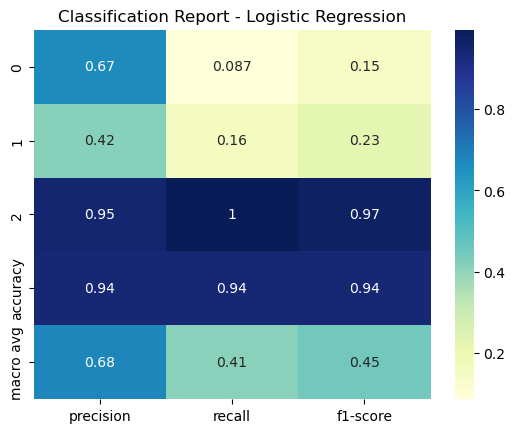

In [95]:
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report - Logistic Regression')
plt.show()

# COnfusion Matrix

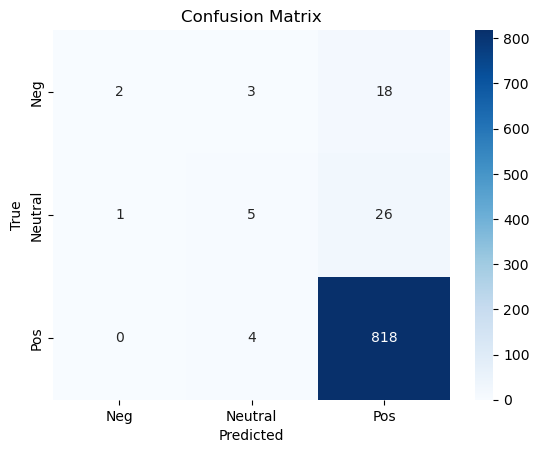

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg', 'Neutral', 'Pos'],
            yticklabels=['Neg', 'Neutral', 'Pos'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [97]:

joblib.dump(pipeline, 'sentiment_pipeline.joblib')
print("✅ Pipeline saved as sentiment_pipeline.joblib")

✅ Pipeline saved as sentiment_pipeline.joblib
